In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [18]:
fake = pd.read_csv("D://KAARUNYA\ML INTERNSHIP FILES/fake and real news kaggle dataset/Fake.csv")

In [19]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [20]:
real = pd.read_csv("D:/KAARUNYA/ML INTERNSHIP FILES/fake and real news kaggle dataset/True.csv")

In [21]:
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [22]:
real["label"] = "REAL"

In [23]:
real

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",REAL
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",REAL
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",REAL
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",REAL


In [24]:
fake["label"] = "FAKE"

In [25]:
fake 

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",FAKE
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",FAKE
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",FAKE
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",FAKE


In [26]:
v = pd.concat([real,fake])
v.reset_index()
v

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",FAKE
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",FAKE
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",FAKE
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",FAKE


C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


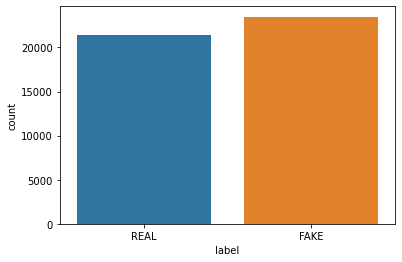

In [27]:
sns.countplot(v['label'])
plt.show()

In [28]:

v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [29]:
X = v.drop(columns = "label",axis = 1)
X

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [30]:
y = v.label
y

0        REAL
1        REAL
2        REAL
3        REAL
4        REAL
         ... 
23476    FAKE
23477    FAKE
23478    FAKE
23479    FAKE
23480    FAKE
Name: label, Length: 44898, dtype: object

In [80]:
print(y_train)

276      FAKE
8909     REAL
23187    FAKE
1810     FAKE
20670    FAKE
         ... 
19613    FAKE
1220     FAKE
21474    FAKE
16951    FAKE
14000    REAL
Name: label, Length: 30081, dtype: object


In [81]:
X_train,X_test,y_train,y_test = train_test_split(v["text"],y,test_size = 0.33,random_state = 50)

In [82]:
print(X_train)

276      Some are saying that Trump has not botched the...
8909     SAN JUAN (Reuters) - Puerto Rico authorized su...
23187    Patrick Henningsen 21st Century Wire Hillary C...
1810     In an interview with Fox Business that aired T...
20670    This news should be enough to end Hillary s ob...
                               ...                        
19613    Trump will bring Churchill back to the White H...
1220     Many of us have been ready to impeach Donald T...
21474    Hillary shows her true colors when a female st...
16951    UPDATE: No #BlackLivesMatter Protests PlannedC...
14000    DHAKA (Reuters) - Several small opposition par...
Name: text, Length: 30081, dtype: object


# using these vectorizers , the machine learning models can  be able to understand the meaning of the given text by splitting and identifing the important words 

In [34]:
count_vectorizer = CountVectorizer(stop_words ="english") # create a vectorizer object by removing the stop words like a, an, the, is,has common words.
count_train = count_vectorizer.fit_transform(X_train) # train the model and then encode the given content 
count_test = count_vectorizer.transform(X_test)     #transform the testing data into the encoded form  (like in a vector form of 0's and 1's )
print(count_train)
print(count_test)

  (0, 81623)	1
  (0, 94079)	4
  (0, 16655)	2
  (0, 77493)	4
  (0, 31792)	3
  (0, 74257)	8
  (0, 78865)	6
  (0, 64637)	1
  (0, 44709)	1
  (0, 94055)	1
  (0, 29919)	2
  (0, 101053)	1
  (0, 16657)	1
  (0, 72748)	1
  (0, 45310)	2
  (0, 58238)	2
  (0, 44083)	1
  (0, 83051)	1
  (0, 1474)	1
  (0, 3562)	1
  (0, 26970)	2
  (0, 40151)	1
  (0, 26656)	1
  (0, 75510)	2
  (0, 94704)	2
  :	:
  (30080, 37444)	2
  (30080, 101050)	1
  (30080, 5329)	1
  (30080, 53032)	1
  (30080, 85460)	1
  (30080, 62512)	1
  (30080, 73318)	1
  (30080, 47722)	1
  (30080, 72353)	1
  (30080, 18101)	1
  (30080, 63284)	3
  (30080, 79547)	2
  (30080, 13287)	4
  (30080, 29412)	1
  (30080, 90602)	1
  (30080, 35190)	1
  (30080, 28445)	4
  (30080, 56890)	1
  (30080, 27748)	1
  (30080, 23590)	1
  (30080, 23589)	1
  (30080, 80812)	1
  (30080, 35678)	1
  (30080, 4240)	1
  (30080, 65407)	1
  (0, 663)	1
  (0, 1474)	1
  (0, 3395)	3
  (0, 7463)	1
  (0, 7580)	1
  (0, 8456)	2
  (0, 8777)	1
  (0, 10499)	1
  (0, 10663)	1
  (0, 10792)	1
  (0

In [35]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',max_df = 0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [36]:
tfidf_vectorizer.get_feature_names()[-10:]

['zz7greitgoo',
 'zzg91b1ax8',
 'zzn3bqnfsk',
 'zzpx_bzka40police',
 'zzqvyk8xif',
 'zzucqevt3m',
 'zzuml4hkoc',
 'zzzzaaaacccchhh',
 'zzzzzzzzzzzzz',
 'émigré']

In [37]:
count_vectorizer .get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000017',
 '00004',
 '000063',
 '000270',
 '00042',
 '0005',
 '0009']

In [38]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns = tfidf_vectorizer.get_feature_names())


In [39]:
tfidf_df

,00,000,0000,00000017,00004,000063,000270,00042,0005,0009,...,zz7greitgoo,zzg91b1ax8,zzn3bqnfsk,zzpx_bzka40police,zzqvyk8xif,zzucqevt3m,zzuml4hkoc,zzzzaaaacccchhh,zzzzzzzzzzzzz,émigré
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.007175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30076,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30077,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30078,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30079,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()
    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")


        
        

In [78]:
m = MultinomialNB()

accuracy : 0.9343
Confusion matrix, without normalization
[[   0    0]
 [   0 6531]]


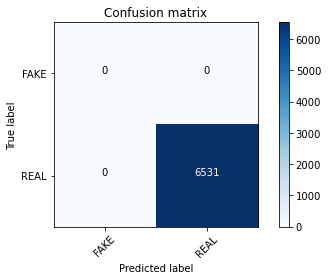

In [79]:
m.fit(tfidf_train,y_train)
result = m.predict(tfidf_test)
score = metrics.accuracy_score(y_test,result)
print("accuracy : %0.4f"%score)
cm = metrics.confusion_matrix(y_test,result, labels = ["FAKE ","REAL"])
plot_confusion_matrix(cm,classes = ['FAKE','REAL'])

